In [7]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/NLP2023/Reviews_Filter.csv')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
analyzer = SentimentIntensityAnalyzer()

In [21]:
df['Compound_Score'] = df['Summary'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

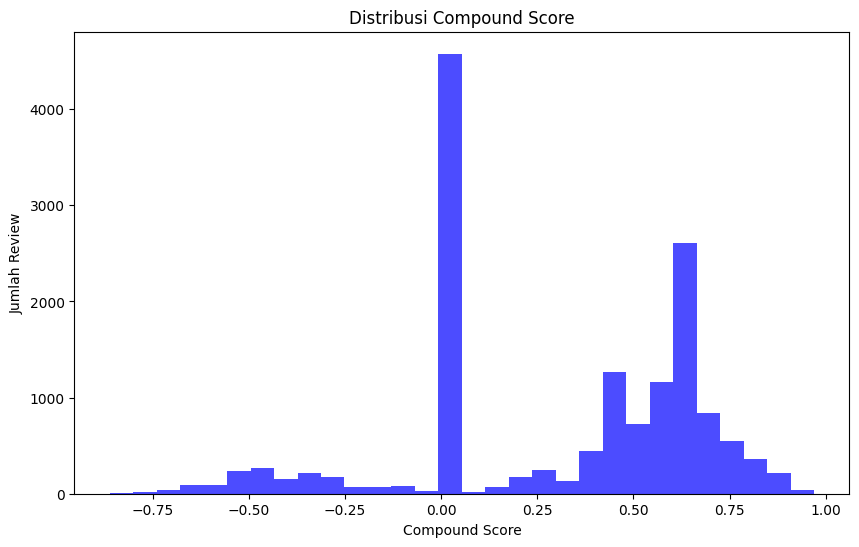

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df['Compound_Score'], bins=30, color='blue', alpha=0.7)
plt.title('Distribusi Compound Score')
plt.xlabel('Compound Score')
plt.ylabel('Jumlah Review')
plt.show()

In [23]:
# Membuat kolom baru untuk menandai review yang mengandung kata "coffee"
df['Contains_Coffee'] = df['Summary'].str.contains('coffee', case=False) | df['Summary'].str.contains('coffee', case=False)

In [24]:
# Filter hanya review yang mengandung kata "coffee"
coffee_reviews = df[df['Contains_Coffee']]

In [29]:
# Hitung compound score untuk review mengandung kata "coffee"
coffee_reviews['Compound_Score'] = coffee_reviews['Summary'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

<ipython-input-29-4881eab52150>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_reviews['Compound_Score'] = coffee_reviews['Summary'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


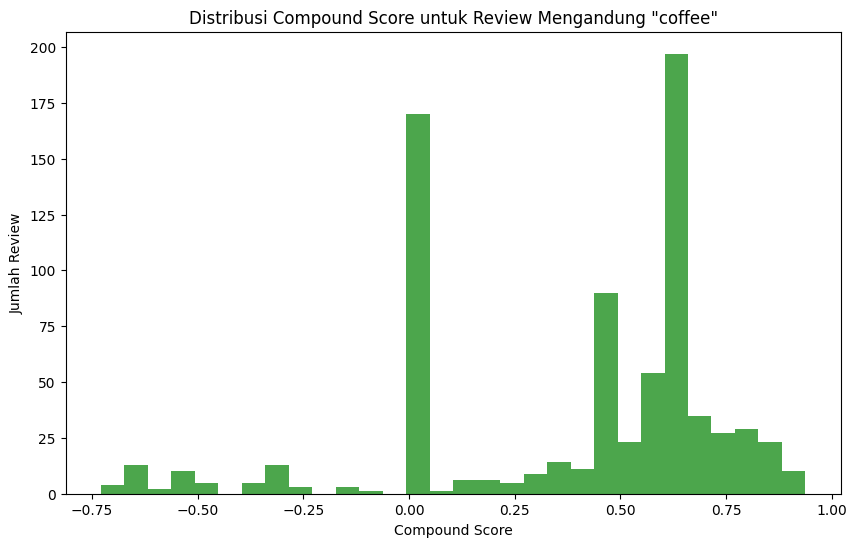

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(coffee_reviews['Compound_Score'], bins=30, color='green', alpha=0.7)
plt.title('Distribusi Compound Score untuk Review Mengandung "coffee"')
plt.xlabel('Compound Score')
plt.ylabel('Jumlah Review')
plt.show()

In [36]:
df['Contains_Price'] = df['Summary'].str.contains('price', case=False) | df['Summary'].str.contains('price', case=False)

In [38]:
price_reviews = df[df['Contains_Price']]

In [39]:
# Hitung compound score untuk review mengandung kata "price"
price_reviews['Compound_Score'] = price_reviews['Summary'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

<ipython-input-39-5dba28f01068>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_reviews['Compound_Score'] = price_reviews['Summary'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


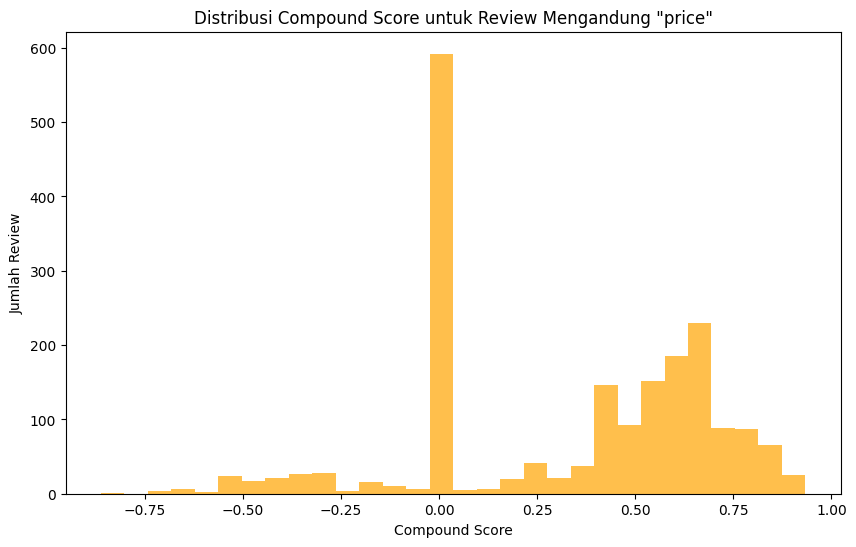

In [40]:
plt.figure(figsize=(10, 6))
plt.hist(price_reviews['Compound_Score'], bins=30, color='orange', alpha=0.7)
plt.title('Distribusi Compound Score untuk Review Mengandung "price"')
plt.xlabel('Compound Score')
plt.ylabel('Jumlah Review')
plt.show()